# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [61]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
# shows all the dataframe's columns
pd.set_option('display.max_columns', 999)
# converts exponencial numbers to float numbers
# pd.options.display.float_format = '{:,.0f}'.format 

## Step 1: Read in Data

In [62]:
test = pd.read_csv('kc_house_data_test_features.csv')
train = pd.read_csv('kc_house_data_train.csv')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [63]:
train

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [64]:
test

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
Unnamed: 0       17290 non-null int64
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In [66]:
train.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [67]:
train.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [68]:
train.drop(columns=['Unnamed: 0','sqft_above'],inplace=True)

In [69]:
# UNCOMMENT THIS CELL

# train.hist(bins=50, figsize=(20,15))
# plt.show()

In [70]:
# IMPORTANT: since the code bellow takes several seconds to load, I commented it.
# Uncomment this code to see the matrix plot

#scatterplot matrix
# sns.pairplot(train)

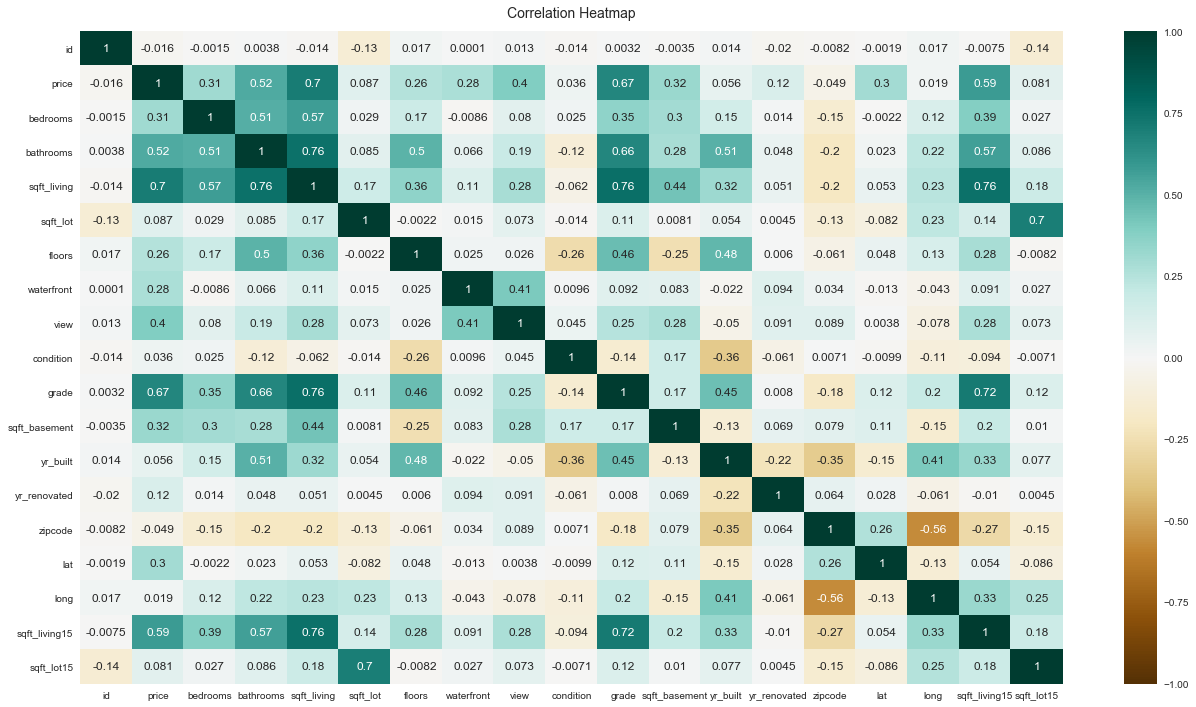

In [71]:
# Increase the size of the heatmap
plt.figure(figsize=(22, 12))
plt.savefig('destination_path.eps', format='eps')
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 12})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([19,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

In [72]:
# Let's drop a few columns that have very low or none correlation with the price

train.drop(columns=['sqft_lot15','sqft_lot','condition'],inplace=True)

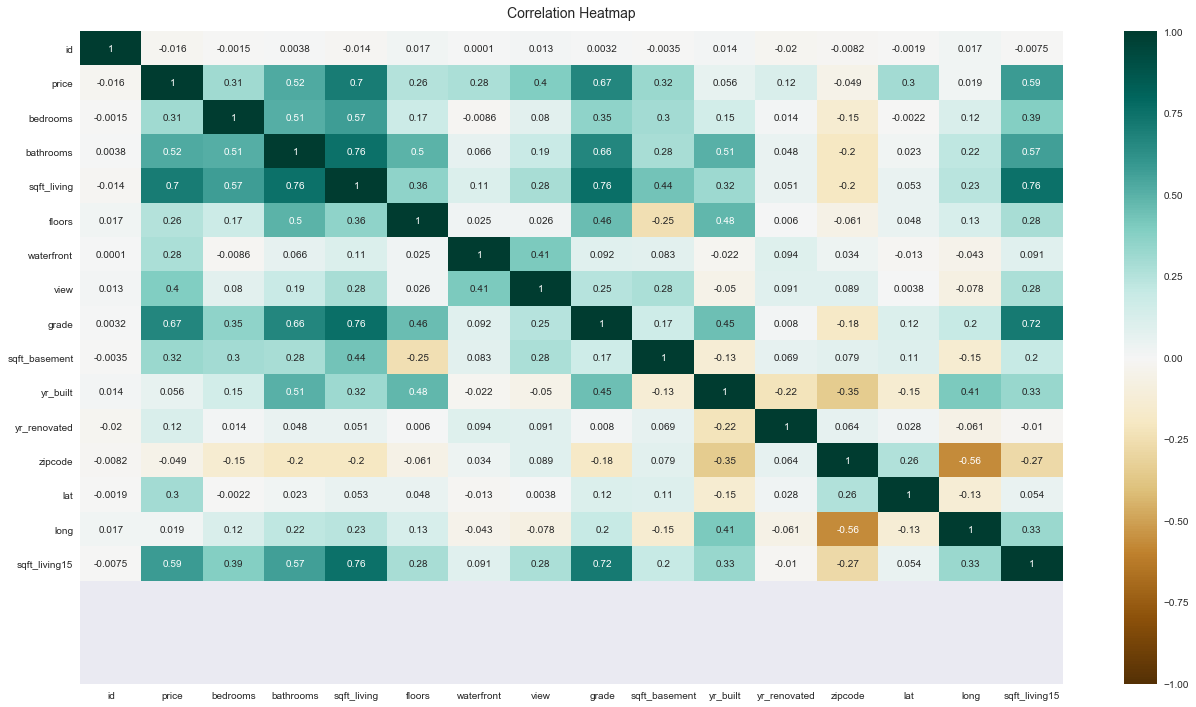

In [73]:
# Increase the size of the heatmap
plt.figure(figsize=(22, 12))
plt.savefig('destination_path.eps', format='eps')
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 10})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([19,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

## "Location, location, location." - Every real state broker

In [74]:
train.zipcode.unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039])

In [75]:
# IMPORTANT - UNCOMMENT THIS CELL

# Creating a histogram with the start_year columns

# x = train.zipcode
# y = train.price
# plt.bar(x, y,edgecolor='white')
# plt.show()

In [76]:
# train[train.groupby('zipcode')]

In [77]:
# train.plot.bar('zipcode','price')

In [78]:
#scatterplot matrix
# sns.pairplot(train)
# plt.savefig('save_as_a_png.png')

In [79]:
# # find the row of the house which has the highest price
# maxpr=df.loc[df['price'].idxmax()]

# # define a function to draw a basemap easily
# def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
#     base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
#     return base_map

# df_copy = df.copy()
# # select a zipcode for the heatmap
# #set(df['zipcode'])
# #df_copy = df[df['zipcode']==98001].copy()
# df_copy['count'] = 1
# basemap = generateBaseMap()
# # add carton position map
# folium.TileLayer('cartodbpositron').add_to(basemap)
# s=folium.FeatureGroup(name='icon').add_to(basemap)
# # add a marker for the house which has the highest price
# folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
#               icon=folium.Icon(color='green')).add_to(s)
# # add heatmap
# HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
#         radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
# folium.LayerControl(collapsed=False).add_to(basemap)
# basemap

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [80]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.490312,0.007981,0.238519,7.654425,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,0.538909,0.088985,0.775229,1.174718,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,1.000000,0.000000,0.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,0.000000,7.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [81]:
print(train.price.isna().any())

False


In [82]:
train.nlargest(5,'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
8597,2402100895,20140625T000000,640000.0,33,1.75,1620,1.0,0,0,7,580,1947,0,98103,47.6878,-122.331,1330
2356,1773100755,20140821T000000,520000.0,11,3.00,3000,2.0,0,0,7,600,1918,1999,98106,47.5560,-122.363,1420
3680,8812401450,20141229T000000,660000.0,10,3.00,2920,2.0,0,0,7,1060,1913,0,98105,47.6635,-122.320,1810
11181,627300145,20140814T000000,1148000.0,10,5.25,4590,1.0,0,2,9,2090,2008,0,98004,47.5861,-122.113,2730
17114,5566100170,20141029T000000,650000.0,10,2.00,3610,2.0,0,0,7,600,1958,0,98006,47.5705,-122.175,2040


Using the house id, I was able to find the house with 33 bedrooms on Zillow. It turns out that there was a typo, thus I'll drop this house.

https://clustrmaps.com/a/1lcrrt/

https://www.zillow.com/homedetails/8023-Corliss-Ave-N-Seattle-WA-98103/48795792_zpid/

In [83]:
# This fixes the house with 33 bedrooms turning it into a 3-bedroom house
train[train['bedrooms'] == 33] = train[train['bedrooms'] == 3]

### Findings:

- There is a house with 33 bedrooms
- There is/are property/properties with 0 bathroom

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [ ]:
df = 

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [101]:
df_zip_dums = pd.get_dummies(train['zipcode'])
df_zips = pd.concat([train, df_zip_dums], axis=1)
#Drop a single column post-.get_dummies() to eliminate information redundancy
df_zips = df_zips.drop(columns=[98103])
df_zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,2.591820e+09,20141006T000000,365000.0,4.0,2.25,2070.0,2.0,0.0,0.0,8.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.974201e+09,20140821T000000,865000.0,5.0,3.00,2900.0,1.0,0.0,0.0,8.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.701450e+09,20140815T000000,1038000.0,4.0,2.50,3770.0,2.0,0.0,2.0,11.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.522300e+09,20150331T000000,1490000.0,3.0,3.50,4560.0,2.0,0.0,2.0,12.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.510861e+09,20140714T000000,711000.0,3.0,2.50,2550.0,2.0,0.0,0.0,9.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [99]:
# This code fixes the
df_zips['date_sold'] = pd.to_datetime(train['date'])
df_zips['year_sold'] = df_zips.date_sold.dt.year
df_zips['month_sold'] = df_zips.date_sold.dt.month
df_zips.drop(columns=['date'],inplace=True)
df_zips.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,date_sold,year_sold,month_sold
0,2.591820e+09,365000.0,4.0,2.25,2070.0,2.0,0.0,0.0,8.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-10-06,2014.0,10.0
1,7.974201e+09,865000.0,5.0,3.00,2900.0,1.0,0.0,0.0,8.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-21,2014.0,8.0
2,7.701450e+09,1038000.0,4.0,2.50,3770.0,2.0,0.0,2.0,11.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-15,2014.0,8.0
3,9.522300e+09,1490000.0,3.0,3.50,4560.0,2.0,0.0,2.0,12.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-31,2015.0,3.0
4,9.510861e+09,711000.0,3.0,2.50,2550.0,2.0,0.0,0.0,9.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-14,2014.0,7.0


In [100]:
# your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [27]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

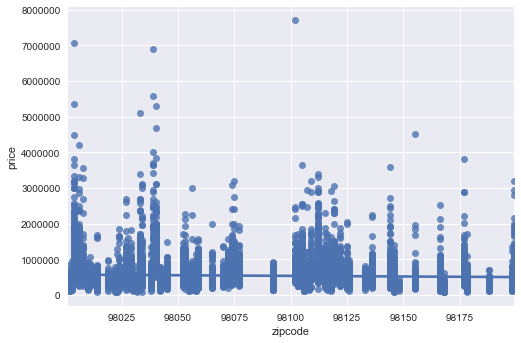

In [94]:
sns.regplot('zipcode','price',data=df_zips)

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [97]:
train_set, test_set = train_test_split(df_zips, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

13832 train + 3458 test


### 5.2) Fit your scaler to training the data.

In [29]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [30]:
#your code here 

### 5.4) Fit the model to the training data.

In [31]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [32]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [33]:
#your code here 

### 5.7) Determine if your model is overfit.

In [34]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [35]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [36]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/